# Data Wrangling
In this first section, the dataset, in its original form, is loaded and analyzed to get an insight on it's features domains, values and meaning; successively, the data is preprocessed in order to create a cleaner csv file as well as to generate additional features that will (hopefully) improve the predictive maintenance model performance.

## Libraries imports
The library <span style="color:#90ee90">**Pandas**</span> will be extensively used throughout the entire notebook, since it is the easiest and most powerful environment to work with in case of datasets managing

In [1]:
import pandas as pd

## Data Loading
The train, test and truth datasets are loaded from the memory and modified into a more organized structure.

Loading the train data:

In [2]:
df_train_raw = pd.read_csv('data/PM_train.txt', sep = ' ', header=None)
df_train_raw

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


We see that the last two columns are unused, we proceed to drop them and assign names to all columns according to their physical meaning

In [3]:
df_train_raw.drop([26,27], axis=1, inplace=True)
col_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
df_train_raw.columns = col_names

### Train Dataset description
The features in the train (and test) dataset represent paramenter values registered by each airplane engine at every cycle, they are arranged as follows:
* **id**: the engine identification number, in this case it is an integer varying from 1 to 100;
* **cycle**: the cycle during which the values were registered, it acts as the timestamp variable;
* **setting1** to **setting3**: engine operational settings;
* **s1** to **s21**: the 21 different sensors that capture engine paramenters during each cycle, all together represent the engine state.

In [4]:
df_train_raw.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


We look at the variables types:

In [6]:
df_train_raw.dtypes

id            int64
cycle         int64
setting1    float64
setting2    float64
setting3    float64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
s7          float64
s8          float64
s9          float64
s10         float64
s11         float64
s12         float64
s13         float64
s14         float64
s15         float64
s16         float64
s17           int64
s18           int64
s19         float64
s20         float64
s21         float64
dtype: object

Now we check if the dataset contains any missing value, something that would create some problems in the modeling phase:

In [7]:
df_train_raw.isnull().sum()

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64

Luckily the dataset provider was careful to remove any (if present) missing (`NaN`) value, so we can continue without having to deal with the realated problems.
A good approach to any new dataset that we encounter is to watch the information given by the `describe` function from <span style="color:#90ee90">**Pandas**</span>:

In [8]:
df_train_raw.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In this way, it's possible to check the fundamental statistics about each feature. 

We see that every feature has a count of 20631 values, which is the number of instances in the training set, in addition, it is straigthforward to investigate on their mean, standard deviation, minimum, maximum and quartiles values.

There is a total of 100 engines, each with a number of cycles between 1 and 362, with a mean of 108 cycles per engine; in this (training) dataset, the last cycle for each engine represents the last cycle of operation before failure.

Loading the test data:

In [9]:
df_test_raw = pd.read_csv('data/PM_test.txt', sep = ' ', header=None)
df_test_raw

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,NaN,NaN
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,NaN,NaN
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,NaN,NaN
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,NaN,NaN


The test data as the same original structure as the train one, so we can prepare it in the same manner as before:

In [10]:
df_test_raw.drop([26,27], axis=1, inplace=True)
df_test_raw.columns = col_names
df_test_raw

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


We look at the variables types:

In [11]:
df_test_raw.dtypes

id            int64
cycle         int64
setting1    float64
setting2    float64
setting3    float64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
s7          float64
s8          float64
s9          float64
s10         float64
s11         float64
s12         float64
s13         float64
s14         float64
s15         float64
s16         float64
s17           int64
s18           int64
s19         float64
s20         float64
s21         float64
dtype: object

We check again for `NaN` values:

In [12]:
df_test_raw.isnull().sum()

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64

After made sure that the test set is also good, we analyze it:

In [13]:
df_test_raw.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.0,1.309600e+04,13096.000000,13096.000000,13096.000000,1.309600e+04,...,13096.000000,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.0,13096.0,13096.000000,13096.000000
mean,51.543907,76.836515,-0.000011,0.000004,100.0,5.186700e+02,642.475088,1588.099204,1404.735362,1.462000e+01,...,521.747724,2388.071025,8138.947817,8.425844,3.000000e-02,392.571625,2388.0,100.0,38.892502,23.335743
std,28.289423,53.057749,0.002203,0.000294,0.0,6.014263e-11,0.400899,5.003274,6.688309,2.671743e-12,...,0.559627,0.056934,10.188605,0.029009,8.823140e-15,1.233577,0.0,0.0,0.141681,0.084120
min,1.000000,1.000000,-0.008200,-0.000600,100.0,5.186700e+02,641.130000,1569.040000,1384.390000,1.462000e+01,...,519.380000,2387.890000,8108.500000,8.332800,3.000000e-02,389.000000,2388.0,100.0,38.310000,22.935400
25%,28.000000,33.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.197500,1584.600000,1399.950000,1.462000e+01,...,521.380000,2388.030000,8132.310000,8.405600,3.000000e-02,392.000000,2388.0,100.0,38.800000,23.281600
50%,52.000000,69.000000,0.000000,0.000000,100.0,5.186700e+02,642.460000,1587.990000,1404.440000,1.462000e+01,...,521.780000,2388.070000,8138.390000,8.424900,3.000000e-02,393.000000,2388.0,100.0,38.900000,23.339200
75%,76.000000,113.000000,0.001500,0.000300,100.0,5.186700e+02,642.740000,1591.362500,1409.050000,1.462000e+01,...,522.150000,2388.110000,8144.360000,8.444300,3.000000e-02,393.000000,2388.0,100.0,38.990000,23.393600
max,100.000000,303.000000,0.007800,0.000700,100.0,5.186700e+02,644.300000,1607.550000,1433.360000,1.462000e+01,...,523.760000,2388.320000,8220.480000,8.541400,3.000000e-02,397.000000,2388.0,100.0,39.410000,23.641900


### Test Dataset description
The ranges of values for the features in the test set are similar to the ones of the train, as we expected.

In this case there are roughly half as many instances (13096), and the cycles per engine (still 100 of them) range from 1 to 303 with an average of 76, though this time the last cycle for every engine doesn't represent the actual cycle before failure; that information is encoded in the last file of the three, the *truth* folder.

Loading the *truth* dataset:

In [14]:
df_truth = pd.read_csv('data/PM_truth.txt', sep = ' ', header=None)
df_truth

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN
...,...,...
95,137,NaN
96,82,NaN
97,59,NaN
98,117,NaN


As usual the structure of the dataframe is modified and cleaned:

In [15]:
df_truth.drop([1], axis=1, inplace=True)
df_truth.columns = ['ttf']
df_truth

,ttf
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


In [16]:
df_truth.describe()

,ttf
count,100.00000
mean,75.52000
std,41.76497
min,7.00000
25%,32.75000
50%,86.00000
75%,112.25000
max,145.00000


### Truth Dataset description
The **time to failure** or **ttf** column shows how many cycles for each of the 100 engines in the test sets actually occurred before failure. Sometimes this feature is referred to as **Remaining Useful Life** or **RUL**, and is the target feature that the regression or classification model aims to predict.
For this reason the **ttf** feature must be extracted from the *truth* file and inserted as new feature in both the *train* and *test* datasets.

## Feature Extraction
In order to work efficiently, a predictive maintenance model needs to not only be able to analyze feature values of the current cycle, but also have an idea of what they where in previous cycles and how they changed in a defined precedent time window.

This concept is implemented through the creation of two extra features: called the **rolling average** and **rolling standard deviation**:
1. **rolling average**: the average value of the feature calculated upon the last time window;
2. **rolling standard deviation**: the standard deviation of the feature calculated upon the last time window.

The function `add_features` does this job:

In [17]:
# Adds the rolling average and rolling standard deviation using fixed rolling window size
def add_features(df_in, rolling_win_size):
    
    s_columns = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
    s_av_columns = ['av1','av2','av3','av4','av5','av6','av7','av8','av9','av10','av11','av12','av13','av14','av15','av16','av17','av18','av19','av20','av21']
    s_sd_columns = ['sd1','sd2','sd3','sd4','sd5','sd6','sd7','sd8','sd9','sd10','sd11','sd12','sd13','sd14','sd15','sd16','sd17','sd18','sd19','sd20','sd21']
    df_out = pd.DataFrame()
    
    # ws is the window time period to calculate the extra features
    ws = rolling_win_size
    
    #calculate rolling stats for each engine id
    for m_id in pd.unique(df_in.id):
    
        # get a subset for each engine sensors
        df_engine = df_in[df_in['id'] == m_id]
        df_sub = df_engine[s_columns]

        # get rolling mean for the subset
        av = df_sub.rolling(ws, min_periods=1).mean()
        av.columns = s_av_columns
    
        # get the rolling standard deviation for the subset
        sd = df_sub.rolling(ws, min_periods=1).std().fillna(0)
        sd.columns = s_sd_columns
    
        # combine the two new subset dataframes columns to the engine subset
        new_ftrs = pd.concat([df_engine,av,sd], axis=1)
    
        # add the new features rows to the output dataframe
        df_out = pd.concat([df_out,new_ftrs])
        
    return df_out

As we said, in order to work with regression or classification models we need to extablish what the actual target of the model will be; in the original dataset, this target feature was not explicitly included, but, in a way, encoded through the information of the number of the last cycle before failure.

For this reason two additional features will be created for each instance:
* **time to failure**: needed for *regression*, additional (integer) feature that indicates how many cycles remain before the respective engine shuts down;
* **classification label**: needed for *classification*, additional (binary) feature that indicates if the respective engine will shut down in a certain period of time (1) or not (0).

The function `prepare_dataset` serves this purpose:

In [18]:
# create regression and classification label for the dataset
def prepare_dataset (df_in, period, df_truth_in = None, test_bool = bool):
    
    if not test_bool:    
        
        # make a dataframe to hold the last cycle for each engine in the dataset
        df_last_cycle = pd.DataFrame(df_in.groupby('id')['cycle'].max())
        df_last_cycle.reset_index(level=0, inplace=True)
        df_last_cycle.columns = ['id', 'last_cycle']

        # add time-to-failure ttf as a new column as regression target
        df_in = pd.merge(df_in, df_last_cycle, on='id')
        df_in['ttf'] = df_in['last_cycle'] - df_in['cycle']
        df_in.drop(['last_cycle'], axis=1, inplace=True)
    
        # create binary classification target
        df_in['label_bnc'] = df_in['ttf'].apply(lambda x: 1 if x <= period else 0)
    
        return df_in
    
    else:
        
        # make a dataframe to hold the last cycle for each engine in the dataset
        df_tst_last_cycle = pd.DataFrame(df_in.groupby('id')['cycle'].max())
        df_tst_last_cycle.reset_index(level=0, inplace=True)
        df_tst_last_cycle.columns = ['id', 'last_cycle']

        # merge the last_cycle dataframe with the original one and select the last instances
        df_in = pd.merge(df_in, df_tst_last_cycle, on='id')
        df_in = df_in[df_in['cycle'] == df_in['last_cycle']]
        df_in.drop(['last_cycle'], axis=1, inplace=True)
        df_in.reset_index(drop=True, inplace=True)

        # add time-to-failure ttf as a new column as regression target
        df_in = pd.concat([df_in, df_truth_in], axis=1)

        #create binary classification target
        df_in['label_bnc'] = df_in['ttf'].apply(lambda x: 1 if x <= period else 0)

        return df_in
    
    

Now we can add the extra features generated from averages and standard deviations, to both the train and test set:

In [19]:
# train set
# adding rolling average and standard deviation of last five instances
df_train_fx = add_features(df_train_raw, 5)
df_train_fx

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.438406,0.035355,5.041671,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.404475,0.026458,3.717450,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.495950,0.029439,3.050906,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.432574,0.025884,2.651326,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,0.460000,0.037014,2.446753,0.027684,0.0,1.643168,0.0,0.0,0.163003,0.086540
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,0.242322,0.035777,2.750731,0.022507,0.0,1.516575,0.0,0.0,0.142583,0.093479
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,0.201544,0.026077,2.578358,0.028242,0.0,1.816590,0.0,0.0,0.137113,0.116735
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,0.187670,0.024083,2.579316,0.028081,0.0,1.643168,0.0,0.0,0.138094,0.112731


In [20]:
# train set
# adding target label columns
df_train = prepare_dataset(df_train_fx, period=30, test_bool=0)
df_train

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,5.041671,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,3.717450,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,3.050906,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2.651326,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2.446753,0.027684,0.0,1.643168,0.0,0.0,0.163003,0.086540,4,1
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2.750731,0.022507,0.0,1.516575,0.0,0.0,0.142583,0.093479,3,1
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2.578358,0.028242,0.0,1.816590,0.0,0.0,0.137113,0.116735,2,1
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2.579316,0.028081,0.0,1.643168,0.0,0.0,0.138094,0.112731,1,1


In [21]:
# test set
# adding rolling average and standard deviation of last 5 instances
df_test_fx = add_features(df_test_raw, 5)
df_test_fx

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,0.311127,0.021213,9.948992,0.017607,0.0,0.707107,0.0,0.0,0.113137,0.012799
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,0.220681,0.017321,7.179807,0.032155,0.0,0.577350,0.0,0.0,0.113725,0.021642
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,0.337182,0.015000,5.890096,0.027781,0.0,0.957427,0.0,0.0,0.093095,0.020353
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,0.329742,0.014142,5.222300,0.024080,0.0,1.303840,0.0,0.0,0.080623,0.020672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,0.359611,0.030332,4.767151,0.028727,0.0,0.707107,0.0,0.0,0.104307,0.065683
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,0.258225,0.034351,4.723455,0.027086,0.0,0.707107,0.0,0.0,0.127750,0.041800
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,0.251157,0.033912,2.766519,0.020140,0.0,0.447214,0.0,0.0,0.074297,0.044916
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,0.273825,0.035637,3.782807,0.012517,0.0,0.447214,0.0,0.0,0.035071,0.044583


In [22]:
# test set
# adding target label columns
df_test = prepare_dataset(df_in=df_test_fx, df_truth_in=df_truth, period=30, test_bool=1)
df_test

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,3.302941,0.021174,0.0,0.707107,0.0,0.0,0.124016,0.025037,112,0
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,1.370062,0.011429,0.0,1.095445,0.0,0.0,0.069785,0.027820,98,0
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,2.979090,0.030924,0.0,0.836660,0.0,0.0,0.143631,0.018966,69,0
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,0.622953,0.021249,0.0,1.341641,0.0,0.0,0.126372,0.021106,82,0
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,1.923609,0.009627,0.0,0.547723,0.0,0.0,0.091924,0.101100,91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,97,-0.0006,0.0003,100.0,518.67,642.30,1590.88,1397.94,14.62,...,3.789252,0.018900,0.0,1.000000,0.0,0.0,0.062048,0.072751,137,0
96,97,134,0.0013,-0.0001,100.0,518.67,642.59,1582.96,1410.92,14.62,...,4.418518,0.018802,0.0,1.341641,0.0,0.0,0.162419,0.054558,82,0
97,98,121,0.0017,0.0001,100.0,518.67,642.68,1599.51,1415.47,14.62,...,3.216823,0.021676,0.0,0.707107,0.0,0.0,0.036469,0.059368,59,0
98,99,97,0.0047,-0.0000,100.0,518.67,642.00,1585.03,1397.98,14.62,...,4.816266,0.016119,0.0,0.707107,0.0,0.0,0.078294,0.078509,117,0


Finally, we save the two datasets in a more accessible *csv* format, that we will use in the future for our tasks:

In [23]:
df_train.to_csv('data/trainmine.csv', index=False)
df_test.to_csv('data/testmine.csv', index=False)

# Feature Selection
In this second section we take a deeper look on the dataset's features, with the aim to determine if some of them may be discarded to improve efficiency and model performance.

This process is based on the fundamental idea that if a variable remains almost unchanged through the entire training dataset, it doesn't contribute to the learning process of the model, so its only effect will be to slow down the training if not to damage it.

A way to identify those kind of variables is to look at their *variance*, if it is below a certain threshold (defined by the expert), then the feature shall be discarded; this process only works if the features are **normalized**, i.e. their value is standardized according to the column's minimum and maximum.

We will use a vey useful library for machine learning called <span style="color:#90ee90">**SciKit Learn**</span>, from which (for now) we import the function `MinMaxScaler`, in order to normalize the data:

In [31]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

Of course the only meaningful features to check for variance are the three **settings** and the twenty-one **sensors**, so we will only use those columns:

In [32]:
columns = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
df= pd.read_csv("data/trainmine.csv", usecols = columns)
df

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


We can already plot the variances of the features, before the normalization, but this won't help much because they have different, scales and many appear as blank bars in the hystogram; however, we may print their actual value and sight-check: 

<AxesSubplot:title={'center':'Features Standard Deviation (before normalization)'}>

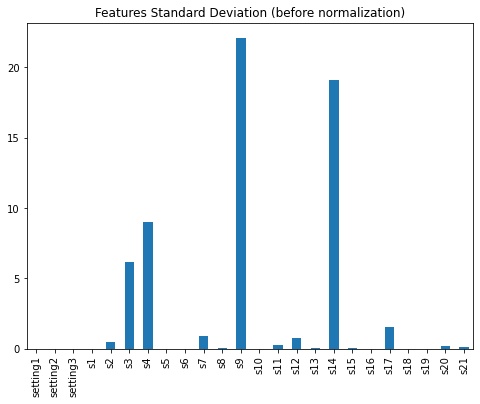

In [33]:
# plot variances before normalization
df.std().plot(kind='bar', figsize=(8,6), title="Features Standard Deviation (before normalization)")

In [34]:
# print variances before normalization
featurs_top_var = df.std().sort_values(ascending=False)
featurs_top_var

s9          2.208288e+01
s14         1.907618e+01
s4          9.000605e+00
s3          6.131150e+00
s17         1.548763e+00
s7          8.850923e-01
s12         7.375534e-01
s2          5.000533e-01
s11         2.670874e-01
s20         1.807464e-01
s21         1.082509e-01
s13         7.191892e-02
s8          7.098548e-02
s15         3.750504e-02
setting1    2.187313e-03
s6          1.388985e-03
setting2    2.930621e-04
s5          1.776400e-15
s16         1.387812e-17
s1          0.000000e+00
s18         0.000000e+00
s19         0.000000e+00
setting3    0.000000e+00
s10         0.000000e+00
dtype: float64

Of course a normalization process is needed, we then proceed to use the function `MinMaxScaler` to get the job done and plot again the results:

In [35]:
# scale the values
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
df

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,1.0,0.726248,...,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662
1,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,1.0,0.628019,...,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014
2,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,1.0,0.710145,...,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375
3,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,1.0,0.740741,...,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386
4,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,1.0,0.668277,...,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,0.477011,0.250000,0.0,0.0,0.686747,0.587312,0.782917,0.0,1.0,0.254428,...,0.170576,0.558824,0.194344,0.656791,0.0,0.750000,0.0,0.0,0.271318,0.109500
20627,0.408046,0.083333,0.0,0.0,0.701807,0.729453,0.866475,0.0,1.0,0.162641,...,0.211087,0.500000,0.188668,0.727203,0.0,0.583333,0.0,0.0,0.124031,0.366197
20628,0.522989,0.500000,0.0,0.0,0.665663,0.684979,0.775321,0.0,1.0,0.175523,...,0.281450,0.529412,0.212148,0.922278,0.0,0.833333,0.0,0.0,0.232558,0.053991
20629,0.436782,0.750000,0.0,0.0,0.608434,0.746021,0.747468,0.0,1.0,0.133655,...,0.208955,0.514706,0.203065,0.823394,0.0,0.583333,0.0,0.0,0.116279,0.234466


<AxesSubplot:title={'center':'Features Standard Deviation (after normalization)'}>

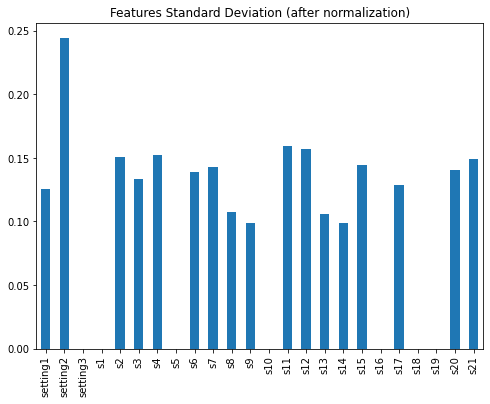

In [36]:
# plot the variances after normalization
df.std().plot(kind='bar', figsize=(8,6), title="Features Standard Deviation (after normalization)")

In [37]:
# print variances after normalization
featurs_top_var = df.std().sort_values(ascending=False)
featurs_top_var

setting2    0.244218
s11         0.158981
s12         0.157261
s4          0.151935
s2          0.150618
s21         0.149476
s15         0.144306
s7          0.142527
s20         0.140114
s6          0.138898
s3          0.133664
s17         0.129064
setting1    0.125708
s8          0.107554
s13         0.105763
s9          0.099089
s14         0.098442
s5          0.000000
s16         0.000000
s1          0.000000
s18         0.000000
s19         0.000000
setting3    0.000000
s10         0.000000
dtype: float64

Now we have a more clear view of the meaningless features, in particular without any doubt the third **setting** and the **sensors** **1**, **5**, **10**, **16**, **18** and **19** have zero variance, so they can be discarded; the rest of the features are very similar in variance, so they can be left in the final dataset.

Finally, the useless features are removed and the new datasets are saved:

In [39]:
columns = ['id', 'cycle', 'setting1', 'setting2', 's2', 's3', 's4', 's6', 's7', 's8', 's9',
            's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21', 'av2', 'av3', 'av4',
            'av6', 'av7', 'av8', 'av9', 'av11', 'av12', 'av13', 'av14', 'av15', 'av17',
            'av20', 'av21', 'sd2', 'sd3', 'sd4', 'sd6', 'sd7', 'sd8', 'sd9', 'sd11',
            'sd12', 'sd13', 'sd14', 'sd15', 'sd17', 'sd20', 'sd21', 'ttf', 'label_bnc']

# train set
df_train_selected = pd.read_csv("data/trainmine.csv", usecols = columns)
df_train_selected.to_csv('data/trainmine_selected.csv', index=False)

# test set
df_test_selected = pd.read_csv("data/testmine.csv", usecols = columns)
df_test_selected.to_csv('data/testmine_selected.csv', index=False)

# Regression Model
In this section we use the train dataset to fit a regression model with the aim to predict the **time to failure** of an engine given its current state and/or previous states.

For this, as we anticipated, we use *non-linear* regression model, in particolar a **Decision Tree Regressor** and its "evolution", the **Random Forest Regressor**; these models will also be used in the final task regarding binary classification.

Firstly we import the necessary libraries; again the library <span style="color:#90ee90">**SciKit Learn**</span> is very useful for the implementation of machine learning algorithms:

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt  

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel, RFECV

Of course we need to load the *train* and *test* datasets, dividing the accessed features between *original* and *extracted*, to see if there is a difference between them in terms of model efficiency and performance:

In [17]:
df_train = pd.read_csv('data/trainmine_selected.csv')
df_test = pd.read_csv('data/testmine_selected.csv')

In [18]:
#Prepare data for regression model

# original features
features_orig = ['setting1','setting2','s2','s3','s4','s6','s7','s8',
                's9','s11','s12','s13','s14', 's15','s17','s20','s21']

# original + extracted fetures
features_extr = ['setting1', 'setting2', 's2', 's3', 's4', 's6', 's7', 's8', 's9',
                's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21', 'av2', 'av3', 'av4',
                'av6', 'av7', 'av8', 'av9', 'av11', 'av12', 'av13', 'av14', 'av15', 'av17',
                'av20', 'av21', 'sd2', 'sd3', 'sd4', 'sd6', 'sd7', 'sd8', 'sd9', 'sd11',
                'sd12', 'sd13', 'sd14', 'sd15', 'sd17', 'sd20', 'sd21']


X_train_orig = df_train[features_orig]
X_test_orig = df_test[features_orig]

X_train_extr = df_train[features_extr]
X_test_extr = df_test[features_extr]

y_train = df_train['ttf']
y_test = df_test['ttf']

The functions `get_regression_metrics` and `plot_residual` help us respectively with the print of the evaluation metrics and the plotting of the residuals:

In [19]:
def get_regression_metrics(model, actual, predicted):

    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted)
                   }
                   
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

In [20]:
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

Now that we have all we need for the evaluation of the performances we are ready to try training the **Decision Tree** algorithm on both the *original* and *extracted* features:

In [24]:
dtrg_orig = DecisionTreeRegressor(max_depth=7, random_state=42)
dtrg_extr = DecisionTreeRegressor(max_depth=7, random_state=42)

dtrg_orig.fit(X_train_orig, y_train)
dtrg_extr.fit(X_train_extr, y_train)

y_test_predict_orig = dtrg_orig.predict(X_test_orig)
y_test_predict_extr = dtrg_extr.predict(X_test_extr)

y_train_predict_orig = dtrg_orig.predict(X_train_orig)
y_train_predict_extr = dtrg_extr.predict(X_train_extr)

dtrg_metrics_orig = get_regression_metrics('Decision Tree Regression Before', y_test, y_test_predict_orig)
dtrg_metrics_extr = get_regression_metrics('Decision Tree Regression After', y_test, y_test_predict_extr)

final_dtrg = pd.concat([dtrg_metrics_orig,dtrg_metrics_extr], axis=1)
final_dtrg

,Decision Tree Regression before,Decision Tree Regression after
Root Mean Squared Error,32.095349,33.567619
Mean Absolute Error,24.319068,23.695536
R^2,0.403480,0.347498
Explained Variance,0.632767,0.546332


As we see the addition of the extracted features didn't really improve the model performance, although the **Mean Absolute Error** did in fact diminish; a possible explanation could be that the added features don't really follow a nice normal distribution like the sensors, and also have a different relation with the taraget feature, so the algorithm could in general get worse by adding them.

Nevertheless, we can also watch a representations of the residuals:

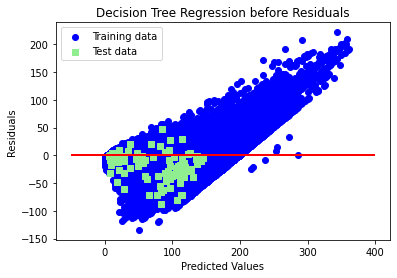

In [25]:
# original
plot_residual('Decision Tree Regression Before', y_train_predict_orig, y_train, y_test_predict_orig, y_test)

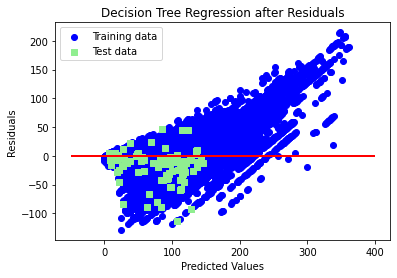

In [26]:
# extracted
plot_residual('Decision Tree Regression After', y_train_predict_extr, y_train, y_test_predict_extr, y_test)

Now we try to improve the performances by using a **Random Forest** approach:

In [28]:
rf_orig = RandomForestRegressor(n_estimators=1000, max_features=3, max_depth=4, n_jobs=-1, random_state=42)
rf_extr = RandomForestRegressor(n_estimators=1000, max_features=3, max_depth=4, n_jobs=-1, random_state=42)

rf_orig.fit(X_train_orig, y_train)
rf_extr.fit(X_train_extr, y_train)

y_test_predict_orig = rf_orig.predict(X_test_orig)
y_test_predict_extr = rf_extr.predict(X_test_extr)

y_train_predict_orig = rf_orig.predict(X_train_orig)
y_train_predict_extr = rf_extr.predict(X_train_extr)

rf_metrics_orig = get_regression_metrics('Random Forest Regression Before', y_test, y_test_predict_orig)
rf_metrics_extr = get_regression_metrics('Random Forest Regression After', y_test, y_test_predict_extr)

final_rf = pd.concat([rf_metrics_orig,rf_metrics_extr], axis=1)
final_rf

,Random Forest Regression before,Random Forest Regression after
Root Mean Squared Error,29.277411,30.400099
Mean Absolute Error,23.280237,24.217209
R^2,0.503630,0.464832
Explained Variance,0.743376,0.712856


We see similar behaviour as before, but with better results overall.

Again we plot:

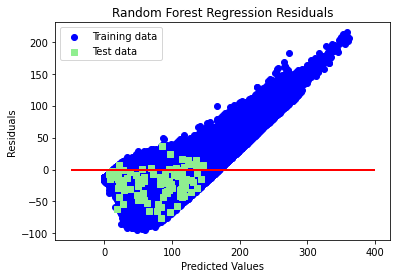

In [29]:
# original
plot_residual('Random Forest Regression Before', y_train_predict_orig, y_train, y_test_predict_orig, y_test)

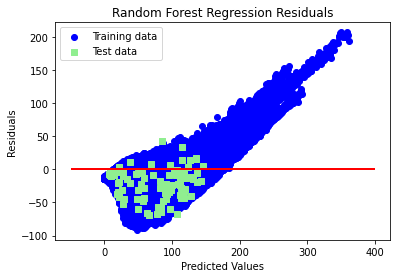

In [30]:
# extracted
plot_residual('Random Forest Regression After', y_train_predict_extr, y_train, y_test_predict_extr, y_test)

### Results of Regression models
We can compare the two models and find the best configuration for regression:

In [32]:
comparisons = pd.concat([final_dtrg,final_rf], axis=1)
comparisons

,Decision Tree Regression before,Decision Tree Regression after,Random Forest Regression before,Random Forest Regression after
Root Mean Squared Error,32.095349,33.567619,29.277411,30.400099
Mean Absolute Error,24.319068,23.695536,23.280237,24.217209
R^2,0.403480,0.347498,0.503630,0.464832
Explained Variance,0.632767,0.546332,0.743376,0.712856


We clearly see that **Random Forest** performs better and overall with good score; its **RMSE** was around 29.28, which means the model is able to predict the **time to failure** of an engine with an uncertainty range of 29.28 cycles.

To see this, we compare the predicted values of the test set with their true value:

In [36]:
rf_pred_dict = {
                'Actual' : y_test,
                'Prediction' : y_test_predict_orig
            }
    
rf_pred = pd.DataFrame.from_dict(rf_pred_dict).T
rf_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Actual,112.000000,98.00000,69.000000,82.000000,91.000000,93.000000,91.00000,95.000000,111.000000,96.000000,...,38.000000,20.00000,85.000000,55.000000,128.000000,137.000000,82.000000,59.00000,117.000000,20.000000
Prediction,153.987844,120.24482,67.360926,104.198112,109.563444,130.303864,128.55488,94.902112,121.508964,128.249694,...,41.286778,30.68548,48.738619,53.761561,143.727588,165.271888,94.317229,106.62534,158.341321,35.198801


### Binary classification
##First consideration on the unbalanced dataset##

In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

from sklearn import metrics

from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
df_train = pd.read_csv('data/trainmine_selected.csv')
df_test = pd.read_csv('data/testmine_selected.csv')

In [ ]:
# print stat for binary classification label

print(df_train['label_bnc'].value_counts())
print('\nNegative samples =  {0:.0%}'.format(df_train['label_bnc'].value_counts()[0]/df_train['label_bnc'].count()))
print('\nPositive samples =  {0:.0%}'.format(df_train['label_bnc'].value_counts()[1]/df_train['label_bnc'].count()))

This is clearly unbalanced dataset, so we should not depend on classification Accuracy as a model performance metric. We can use AUC ROC instead.

In [ ]:
#Prepare data for regression model

# original features
features_orig = ['setting1','setting2','s2','s3','s4','s6','s7','s8',
                's9','s11','s12','s13','s14', 's15','s17','s20','s21']

# original + extracted fetures
features_extr = ['setting1', 'setting2', 's2', 's3', 's4', 's6', 's7', 's8', 's9',
                's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21', 'av2', 'av3', 'av4',
                'av6', 'av7', 'av8', 'av9', 'av11', 'av12', 'av13', 'av14', 'av15', 'av17',
                'av20', 'av21', 'sd2', 'sd3', 'sd4', 'sd6', 'sd7', 'sd8', 'sd9', 'sd11',
                'sd12', 'sd13', 'sd14', 'sd15', 'sd17', 'sd20', 'sd21']


X_train_orig = df_train[features_orig]
X_test_orig = df_test[features_orig]

X_train_extr = df_train[features_extr]
X_test_extr = df_test[features_extr]

y_train = df_train['ttf']
y_test = df_test['ttf']